In [5]:
from sklearn.preprocessing import Normalizer
data = [[1, 1, 1], [1, 1, 0], [1, 0, 0]]
normalizer = Normalizer(norm='l2')
print(normalizer.fit_transform(data))

[[0.57735027 0.57735027 0.57735027]
 [0.70710678 0.70710678 0.        ]
 [1.         0.         0.        ]]


In [6]:
from sklearn.preprocessing import Normalizer
data = [[1, 1, 1], [1, 1, 0], [1, 0, 0]]
normalizer = Normalizer(norm='l1')
print(normalizer.fit_transform(data))

[[0.33333333 0.33333333 0.33333333]
 [0.5        0.5        0.        ]
 [1.         0.         0.        ]]


Fearure Encoding 

Types:

1: Label Encoding 

2: One_hot Encoding

3: Ordinal Encoding

4: Binary Encoding

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# data load
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [9]:
df['time'].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

In [10]:
#  Encode time in label encoder with sklearn
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
le = LabelEncoder()
df['encoded_time'] = le.fit_transform(df['time'])
df.head()

,total_bill,tip,sex,smoker,day,time,size,encoded_time
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0
2,21.01,3.50,Male,No,Sun,Dinner,3,0
3,23.68,3.31,Male,No,Sun,Dinner,2,0
4,24.59,3.61,Female,No,Sun,Dinner,4,0


In [11]:
df['encoded_time'].value_counts()

encoded_time
0    176
1     68
Name: count, dtype: int64

In [12]:
# Encode days with Ordinal Encoder
df['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [13]:
ord = OrdinalEncoder(categories=[['Sat', 'Sun', 'Thur', 'Fri']])
df['encode_day'] = ord.fit_transform(df[['day']])
df.head()


,total_bill,tip,sex,smoker,day,time,size,encoded_time,encode_day
0,16.99,1.01,Female,No,Sun,Dinner,2,0,1.0
1,10.34,1.66,Male,No,Sun,Dinner,3,0,1.0
2,21.01,3.50,Male,No,Sun,Dinner,3,0,1.0
3,23.68,3.31,Male,No,Sun,Dinner,2,0,1.0
4,24.59,3.61,Female,No,Sun,Dinner,4,0,1.0


In [14]:
df['encode_day'].value_counts()

encode_day
0.0    87
1.0    76
2.0    62
3.0    19
Name: count, dtype: int64

In [15]:
# Encode days with One Hot  Encoder
df['sex'].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

In [ ]:
ord = OneHotEncoder()
df['ecode_sex'] = ord.fit_transform(df[['sex']])
df['ecode_sex'].to_xarray()
df.head()


In [36]:
# Binning data using get dummies 
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [38]:
get_dummies = pd.get_dummies(df, columns=['days'],dty)
get_dummies.head()

KeyError: "None of [Index(['days'], dtype='object')] are in the [columns]"

Data Discritization

In [23]:
#  import libraries
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer

In [26]:
df = pd.read_csv('C:/Users/Murtaza/Desktop/hawa/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
# impute missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

In [28]:
# Age discretization 
age_discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform' )
df['age_bins'] = age_discretizer.fit_transform(df[['Age']])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_bins
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2.0


<Axes: xlabel='Age', ylabel='Count'>

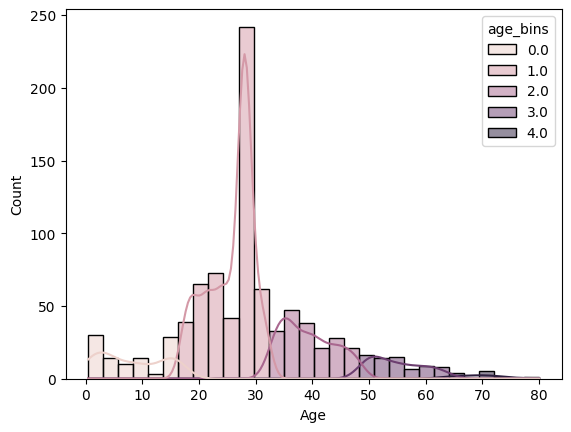

In [33]:
sns.histplot(df, x='Age', hue='age_bins', kde=True)